# Multi Layer Perceptron

Các hệ số thành phần của mô hình:
- $\mathbf{W}^{(l)} \in \mathbb{R}^{d^{(l - 1)} \times d(l)})$: ma trận trong số tại layer thứ  $l$  ($l = 1, 2,..., L$), coi layer input là layer thứ 0. 
  Trong đó:   + $w_{ij}$ là từ node thứ $i$ của laryer $l - 1$ đến node thứ $j$ của layer $l$.
              + $d^(l)$: số node của layer thứ $l$ không tính node bias.
- $\mathbf{b}^{(l)} \in \mathbb{R}^{d(l)}$: biases của layer thứ l
- $\mathbf{a}^{(l)} \in \mathbb{R}^{d(l)}$: output của layer thứ l
- $f()$: là một (nonlinear) activation function

<img src="img/mlp_notation.png" alt="drawing" width='50%'/>

## Backpropagation 


Đây là phương pháp sử dụng để tối ưu MLP sử dụng gradient descent.  
Để áp dụng GD cần tính được đạo hàm của $\mathbf{W}^{(l)}, \mathbf{b}^{(l)}$.  
Gọi $J(\mathbf{W, b, X, Y})$ là hàm mất mát. Cần tính: $\frac{\partial J}{\partial \mathbf{W}^{(l)}}$ và $\frac{\partial J}{\partial \mathbf{b}^{(l)}}$  
Giả sử hàm mất mát là MSE: $J = \frac{1}{N} \sum_{i = 1}^N || y_i -\hat y_i ||_{2}^2 $,  $\hat y_i = \mathbf{a}_i ^{(L)}$  
Khi đó các giá trị đạo hàm là:  
$$
\begin{align*}
\frac{\partial J}{\partial w_{ij}^{(l)}} &= \frac{\partial J}{\partial z_j^{(l)}} \frac{\partial z_j^{(l)}}{\partial w_{ij}^{(l)}} \\
&= e_j ^ {(l)} a_i^{(l-1)}
\end{align*}
$$ 
với 
$$ 
\begin{align*}
e_j ^ {(l)} &=  \frac{\partial J}{\partial z_j^{(l)}} \\
            &= \frac{\partial J}{\partial a_j^{(l)}} \frac{\partial a_j^{(l)}}{\partial z_j^{(l)}} \\
            &= (\sum_{k = 1}^{d^{(l + 1)}} \frac{\partial J}{\partial z_k^{(l + 1)}} \frac{\partial z_k^{(l + 1)}}{\partial a_j^{(l)}}) f'(z_j ^{(l)}) \\
            &= (\sum_{k = 1}^{d^{(l + 1)}} e_j^{(l + 1)} w_{jk}^{(l + 1)}) f'(z_j^{(l)}) \\
            &= (\mathbf{w}_{j:}^{(l + 1)} \mathbf{e}^(l + 1)) f'(z_j^{(l)})
\end{align*}
$$
Trong đó: $\mathbf{w}_{j:}$ là lấy hàng j của ma trận $W$   
Và $$ \frac{\partial J}{\partial b_j ^{(l)}} = e_j^{(l)}$$
Tại output layer : \\
$$
\begin{align*}
\frac{\partial J}{\partial w_{ij}^{(L)}} &= \frac{\partial J}{\partial z_j^{(L)}} \frac{\partial z_j^{(L)}}{\partial w_{ij}^{(L)}}\\
&= e_j ^ {(L)} a_i^{(L-1)} \\
 \frac{\partial J}{\partial b_j ^{(L)}} &= e_j^{(L)}
\end{align*}
$$

## Ví dụ

Ví dụ sử dụng activation function J là max(x, 0)  
Sử dụng hàm softmax() để tính xác suất dự đoán
=> tính các đạo hàm cần thiết

**feedforwark**
$$
\begin{align*}
\mathbf{Z}^{(1)} &= \mathbf{W}^{(1)T} \mathbf{X} \\
\mathbf{A}^{(1)} &= \max(\mathbf{Z}^{(1)}, 0) \\
\mathbf{Z}^{(2)} &= \mathbf{W}^{(2)T} \mathbf{A}^{(1)} \\
\mathbf{ \hat Y} &= \mathbf{A}^{(2)} = \text{softmax}(\mathbf{Z}^{(2)})
\end{align*}
$$

**Backpropagation**
Dựa trên các đạo hàm bên trên

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
N = 100
num_class = 3
dim = 2 # số chiều dữ liệu
X = np.zeros((dim, N * num_class))
y = np.zeros(N*num_class, dtype='uint8')

for j in range(num_class):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N)
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N) * 0.2
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

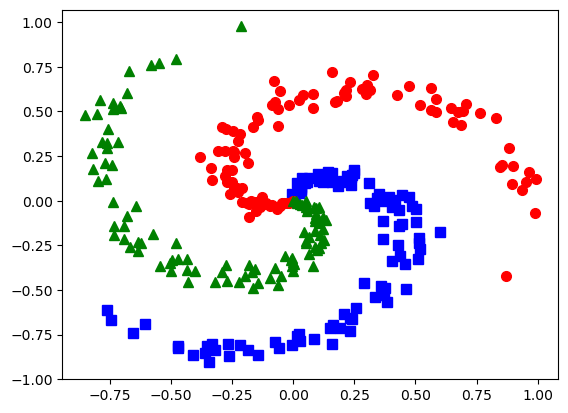

In [5]:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);

In [6]:
def softmax(z):
    e_z = np.exp(z - np.max(z, axis=0, keepdims=True)) #Trừ đi max để tránh tràn hàm exp 
    return e_z/e_z.sum(axis = 0)  # vector

In [7]:
# one-hot
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [8]:
# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [9]:
d0 = 2
d1 = h = 100 # size of hidden layer
d2 = num_class = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, num_class)
N = X.shape[1]
eta = 1 # learning rate
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i %1000 == 0:
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 1.098573
iter 1000, loss: 0.144480
iter 2000, loss: 0.054115
iter 3000, loss: 0.037792
iter 4000, loss: 0.030824
iter 5000, loss: 0.026860
iter 6000, loss: 0.024086
iter 7000, loss: 0.022238
iter 8000, loss: 0.020862
iter 9000, loss: 0.019808


In [10]:
a = 0.01 * np.random.randn(d0, d1)

In [11]:
a.shape

(2, 100)

In [12]:
#Sử dụng phương pháp Stochastic Gradient Descent

class MLP_SGD:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.W1 = np.random.randn( input_dim, hidden_dim) * 0.01
        self.b1 = np.zeros((hidden_dim, 1))
        self.W2 = np.random.randn(hidden_dim, output_dim) * 0.01
        self.b2 = np.zeros((output_dim, 1))

    def forward(self, X):
        self.Z1 = np.dot(self.W1.T, X) + self.b1
        self.A1 = np.maximum(self.Z1, 0)
        self.Z2 = np.dot(self.W2.T, self.A1) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def backward(self,x, Yhat, y_true, learning_rate):
        E2 = Yhat - y_true
        dW2 = np.dot(self.A1, E2.T)
        db2 = np.sum(E2, axis=1, keepdims=True)
        E1 = np.dot(self.W2, E2)
        E1[self.Z1 <= 0] = 0  # gradient of ReLU
        dW1 = np.dot(x, E1.T)
        db1 = np.sum(E1, axis=1, keepdims=True)
    
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, learning_rate, epochs):
        m = X.shape[1]
        Y = convert_labels(y, num_class)
        for epoch in range(epochs):
            # Sử dụng SGD
            total_loss = 0
            mix_id = np.random.permutation(m)
            for i in mix_id:
                X_sample = X[:, i].reshape(dim, 1)
                y_sample = Y[:, i].reshape(num_class, 1)

                y_pred = self.forward(X_sample)
                total_loss += cost(y_sample, y_pred)
                self.backward(X_sample, y_pred, y_sample, learning_rate)
            
            if epoch % 100 == 0:
                print(f'Epoch {epoch}: Loss {total_loss/m}')
            if(total_loss / m < 0.05):
                return
                
    def accuracy(self, X, y):
        Z1 = np.dot(self.W1.T, X) + self.b1
        A1 = np.maximum(Z1, 0)
        Z2 = np.dot(self.W2.T, A1) + self.b2
        predicted_class = np.argmax(Z2, axis=0) # trả về chỉ số của phần tử lớn nhất trên mỗi cột.
        print('training accuracy: %.2f %%' % (100*np.mean(predicted_class == y)))

In [13]:
N = 100
num_class = 3
dim = 2 # số chiều dữ liệu
X = np.zeros((dim, N * num_class))
y = np.zeros(N*num_class, dtype='uint8')

for j in range(num_class):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N)
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N) * 0.2
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

In [14]:
input_dim = dim
hidden_dim = 128
output_dim = num_class
learning_rate = 0.01
epochs = 1000

model = MLP_SGD(input_dim, hidden_dim, output_dim)
model.train(X, y, learning_rate, epochs)

Epoch 0: Loss 1.1004128488668845
Epoch 100: Loss 0.4272407791611705
Epoch 200: Loss 0.21331451598520781
Epoch 300: Loss 0.13276741758687985
Epoch 400: Loss 0.09674452513906476
Epoch 500: Loss 0.0745592215452002
Epoch 600: Loss 0.06058438010994293


In [229]:
model.accuracy(X, y)

[[ 3.93116572e-01  7.16233656e-01  9.39728889e-01  1.32263220e+00
   1.56137810e+00  1.65468666e+00  2.10812509e+00  2.74262072e+00
   3.06539063e+00  3.43217429e+00  3.75008447e+00  4.11571750e+00
   4.26150000e+00  4.20046181e+00  4.23431679e+00  4.44391843e+00
   4.55775290e+00  4.38653377e+00  4.58151776e+00  4.75197539e+00
   4.56504309e+00  4.48903438e+00  4.43143838e+00  4.50037684e+00
   4.87317467e+00  4.68685690e+00  4.88448290e+00  5.13374815e+00
   4.86280912e+00  5.24937371e+00  5.05994635e+00  5.03870364e+00
   5.19758840e+00  5.35739005e+00  5.08822855e+00  5.25983313e+00
   4.99680920e+00  4.82175802e+00  5.34976144e+00  5.78671610e+00
   4.58637454e+00  4.61487362e+00  4.08576217e+00  4.25401382e+00
   6.36094689e+00  6.97667731e+00  5.75356639e+00  6.90660663e+00
   7.97053538e+00  5.32727437e+00  6.74042466e+00  8.82778810e+00
   6.87003866e+00  5.66600187e+00  7.96764440e+00  6.31427644e+00
   9.18397868e+00  9.52568833e+00  9.50409043e+00  9.82049706e+00
   7.45980

In [107]:
Y.shape

(3, 300)